In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random
np.random.seed(0)

In [6]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs # Get data

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [7]:
!ls german-traffic-signs/ # List all files

signnames.csv  test.p  train.p	valid.p


In [8]:
# Unpickle Data
with open('german-traffic-signs/train.p', 'rb') as f: # read the pickle file in binary
  train_data = pickle.load(f)

with open('german-traffic-signs/valid.p', 'rb') as f: # read the pickle file in binary
  val_data = pickle.load(f)
  
with open('german-traffic-signs/test.p', 'rb') as f: # read the pickle file in binary
  test_data = pickle.load(f)
  
print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [9]:
# Analyze the Data
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
# Print errors if input data is not correct
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equel to the number of labels'
assert(X_val.shape[0] == y_val.shape[0]), 'The number of images is not equel to the number of labels'
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equel to the number of labels'
assert(X_train.shape[1:] == (32, 32, 3)), 'The dimensions of the images are not 32 x 32 x 3'
assert(X_val.shape[1:] == (32, 32, 3)), 'The dimensions of the images are not 32 x 32 x 3'
assert(X_test.shape[1:] == (32, 32, 3)), 'The dimensions of the images are not 32 x 32 x 3'

   ClassId                     SignName
0        0         Speed limit (20km/h)
1        1         Speed limit (30km/h)
2        2         Speed limit (50km/h)
3        3         Speed limit (60km/h)
4        4         Speed limit (70km/h)
5        5         Speed limit (80km/h)
6        6  End of speed limit (80km/h)
7        7        Speed limit (100km/h)
8        8        Speed limit (120km/h)
9        9                   No passing


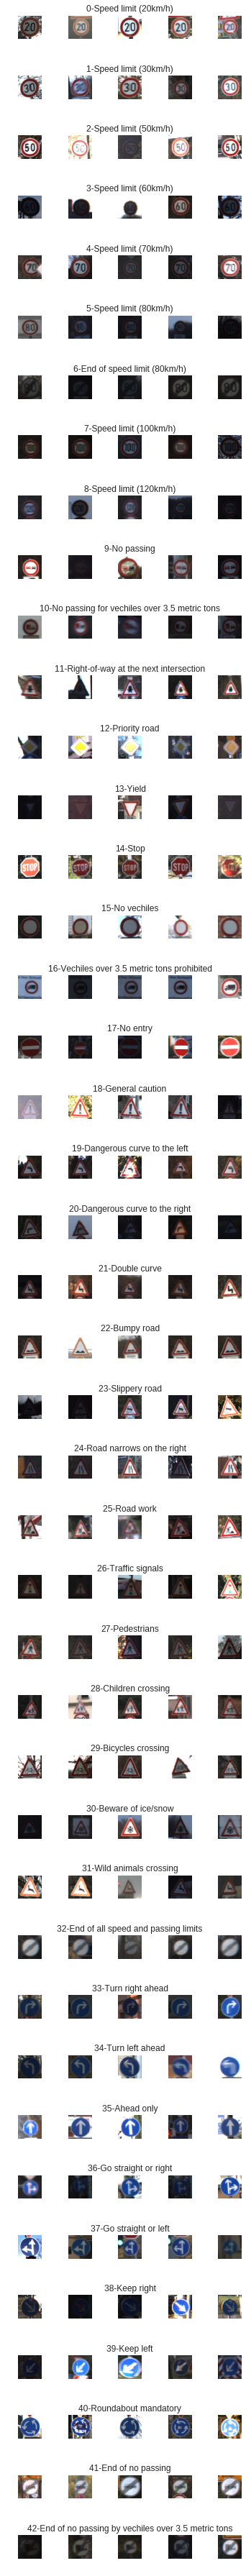

In [19]:
# Analyze the Data
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data[:10])

num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows(): # (index, Series)
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

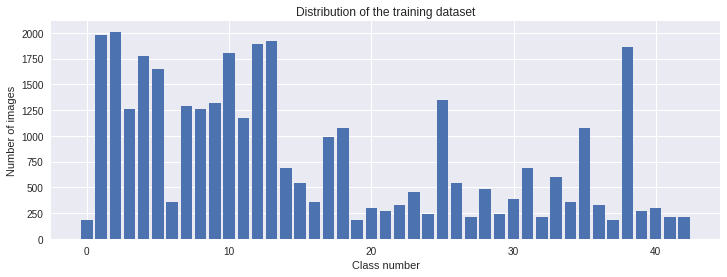

In [16]:
# Print Distribution
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


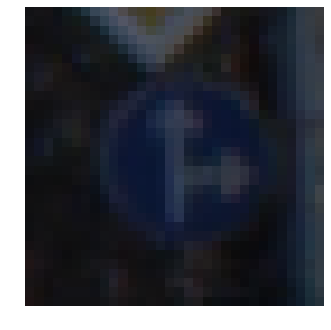

In [22]:
# Preprocess images

import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


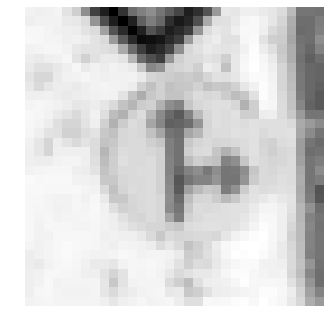

In [24]:
# Grayscaling

def grayscale(img): # convert rgb to grayscale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

# Test
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

(32, 32)


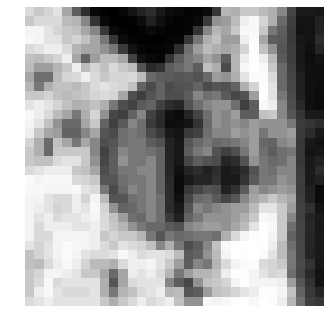

In [25]:
# Equalize the histogram of an image (equalize brighter and darker images)

def equalize(img):
  img = cv2.equalizeHist(img)
  return img

# Test
img = equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255 # normalization
  return img

In [0]:
# Preprocess whole data

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


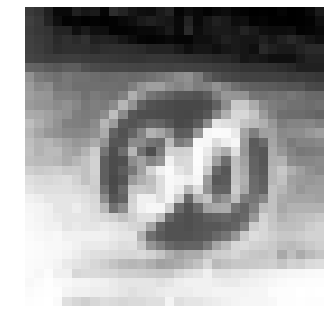

In [33]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [36]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [0]:
# One hot-encoding

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)